In [ ]:
pip install ndlib

In [ ]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ndlib.models.epidemics as ep
import json
import ndlib.models.ModelConfig as mc
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
from ndlib.viz.mpl.DiffusionPrevalence import DiffusionPrevalence

In [ ]:
g = nx.read_gml("football.gml")
#g = nx.karate_club_graph()
#g = nx.read_gml("dolphins.gml")
nodes = len(g.nodes)

In [ ]:
nodes

115

 CENTRALITY

In [ ]:
centrality = nx.degree_centrality(g)
#centrality = nx.betweenness_centrality(g)
#centrality = nx.closeness_centrality(g)

In [ ]:
centrality

{'AirForce': 0.08771929824561403,
 'Akron': 0.09649122807017543,
 'Alabama': 0.09649122807017543,
 'AlabamaBirmingham': 0.08771929824561403,
 'Arizona': 0.09649122807017543,
 'ArizonaState': 0.09649122807017543,
 'Arkansas': 0.08771929824561403,
 'ArkansasState': 0.08771929824561403,
 'Army': 0.09649122807017543,
 'Auburn': 0.09649122807017543,
 'BallState': 0.08771929824561403,
 'Baylor': 0.08771929824561403,
 'BoiseState': 0.07894736842105263,
 'BostonCollege': 0.09649122807017543,
 'BowlingGreenState': 0.09649122807017543,
 'BrighamYoung': 0.10526315789473684,
 'Buffalo': 0.09649122807017543,
 'California': 0.09649122807017543,
 'CentralFlorida': 0.07017543859649122,
 'CentralMichigan': 0.09649122807017543,
 'Cincinnati': 0.09649122807017543,
 'Clemson': 0.08771929824561403,
 'Colorado': 0.09649122807017543,
 'ColoradoState': 0.08771929824561403,
 'Connecticut': 0.06140350877192982,
 'Duke': 0.09649122807017543,
 'EastCarolina': 0.09649122807017543,
 'EasternMichigan': 0.09649122807

MAKING A DATAFRAME

In [ ]:
df=pd.DataFrame(centrality.values()).describe()

In [ ]:
df

,0
count,115.000000
mean,0.093516
std,0.007784
min,0.061404
25%,0.087719
50%,0.096491
75%,0.096491
max,0.105263


**Whole graph coverage**

In [ ]:
def whole_graph_coverage():

  for j in range(3,8):
    iterations=[]
    for key,value in centrality.items():
      if value == df[0][j]:
        infected_node = [key]

        model = ep.SIModel(g)
        cfg = mc.Configuration()
        cfg.add_model_parameter('beta', 0.1) # infection rate
        cfg.add_model_initial_configuration("Infected", infected_node)
        model.set_initial_status(cfg)

        infected = 0
        i = 0
        while(infected != nodes):
          iteration = model.iteration()
          infected = iteration['node_count'][1]
          i+=1
        
        iterations.append(i)

    required_iterations.append(iterations)
        

In [ ]:
required_iterations=[]
whole_graph_coverage()

In [ ]:
print(required_iterations)

[[20, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0], [17, 17, 20, 14, 20, 16, 14, 17, 15, 16], [14, 17, 15, 18, 14, 17, 17, 15, 14, 18], [18, 17, 18, 17, 15, 19, 14, 19, 19, 16], [18, 16, 17, 15, 15, 15, 16, 16, 15, 13]]


In [ ]:
pad=10
for lst in required_iterations:
  while(len(lst)!=pad):
    if(len(lst)>pad): lst.pop()
    else: lst.append(np.mean(lst))

In [ ]:
data=pd.DataFrame({'min' : required_iterations[0], 
                   'min_med' : required_iterations[1],
                   'median' : required_iterations[2],
                   'max_med' : required_iterations[3],
                   'max' : required_iterations[4]})


In [ ]:
data

,min,min_med,median,max_med,max
0,20.0,17,14,18,18
1,20.0,17,17,17,16
2,20.0,20,15,18,17
3,20.0,14,18,17,15
4,20.0,20,14,15,15
5,20.0,16,17,19,15
6,20.0,14,17,14,16
7,20.0,17,15,19,16
8,20.0,15,14,19,15
9,20.0,16,18,16,13


BOXPLOT OF WHOLE GRAPH COVERAGE

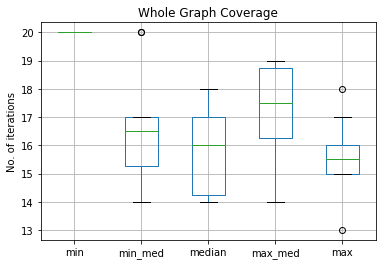

In [ ]:
%matplotlib inline
plt.figure()
plt.title('Whole Graph Coverage')
plt.ylabel('No. of iterations')
data.boxplot(column=['min', 'min_med', 'median','max_med','max'])

USING THE SI MODEL FOR SPREADING THE RUMOUR

In [ ]:
model = ep.SIModel(g)
cfg = mc.Configuration()
cfg.add_model_parameter('beta', 0.1) # infection rate
cfg.add_model_initial_configuration("Infected", ['NewMexico'])
model.set_initial_status(cfg)

In [ ]:
iteration = model.iteration()
iteration
node_stats=iteration['status']

In [ ]:
infected_nodes=[]
for i in node_stats:
  if node_stats[i]==1:
    infected_nodes.append(i)
infected_nodes

['NewMexico']

In [ ]:
NC=[]
while(len(infected_nodes) != nodes):
  # print(len(infected_nodes))
  iteration = model.iteration()
  node_stats=iteration['status']
  #print(node_stats)
  if(len(node_stats)!=0):
    for key in node_stats.keys():
      infected_nodes.append(key)

  infected = iteration['node_count'][1]
  sum=0
  for node in infected_nodes:
    infected_neighbors=set(infected_nodes)&set(nx.neighbors(g,node))
    sum+=len(infected_neighbors)/len(list(nx.neighbors(g,node)))
  NC.append(sum/iteration['node_count'][1])

print(NC)

[0.0, 0.0, 0.08712121212121213, 0.17676767676767677, 0.457070707070707, 0.457034632034632, 0.42826086956521736, 0.5154381654381656, 0.6060120435120436, 0.6974037247474748, 0.779924242424242, 0.8736027431903722, 0.9267087995861576, 0.9538551095369278, 0.9910419989367358, 1.0]


FINDING THE NEIGHBOUR COVERAGE

In [ ]:
def neighbour_coverage():

  for j in range(3,8):
    iterations=[]
    for key,value in centrality.items():
      if value == df[0][j]:
        infected_node = [key]

        model = ep.SIModel(g)
        cfg = mc.Configuration()
        cfg.add_model_parameter('beta', 0.1) # infection rate
        cfg.add_model_initial_configuration("Infected", infected_node)
        model.set_initial_status(cfg)

        iteration = model.iteration()
        node_stats=iteration['status']

        infected_nodes=[]
        for i in node_stats:
          if node_stats[i]==1:
            infected_nodes.append(i)
        infected_nodes

        NC=[0]
        while(len(infected_nodes) != nodes):
          # print(len(infected_nodes))
          iteration = model.iteration()
          node_stats=iteration['status']
          #print(node_stats)
          if(len(node_stats)!=0):
            for key in node_stats.keys():
              infected_nodes.append(key)

          infected = iteration['node_count'][1]
          sum=0
          for node in infected_nodes:
            infected_neighbors=set(infected_nodes)&set(nx.neighbors(g,node))
            sum+=len(infected_neighbors)/len(list(nx.neighbors(g,node)))
          NC.append(sum/iteration['node_count'][1])

        required_iterations_dict[j].append(NC)

In [ ]:
required_iterations_dict = {3: [], 4 : [], 5 : [], 6 : [], 7 : []}

CALLING THE FUNCTION

In [ ]:
neighbour_coverage()

In [ ]:
required_iterations

[[20, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0],
 [17, 17, 20, 14, 20, 16, 14, 17, 15, 16],
 [14, 17, 15, 18, 14, 17, 17, 15, 14, 18],
 [18, 17, 18, 17, 15, 19, 14, 19, 19, 16],
 [18, 16, 17, 15, 15, 15, 16, 16, 15, 13]]

In [ ]:
len(required_iterations_dict[7][10])

16

In [ ]:
table_min=[]
for j in range(11):
  col=[]
  for i in range(len(required_iterations_dict[3])):
    col.append(required_iterations_dict[3][i][j])
  table_min.append(col)

df_min=pd.DataFrame(table_min).T

In [ ]:
table_min_med=[]
for j in range(11):
  col=[]
  for i in range(len(required_iterations_dict[4])):
    col.append(required_iterations_dict[4][i][j])
  table_min_med.append(col)

df_min_med=pd.DataFrame(table_min_med).T

In [ ]:
table_median=[]
for j in range(11):
  col=[]
  for i in range(len(required_iterations_dict[5])):
    col.append(required_iterations_dict[5][i][j])
  table_median.append(col)

df_median=pd.DataFrame(table_median).T

In [ ]:
table_max_med=[]
for j in range(11):
  col=[]
  for i in range(len(required_iterations_dict[6])):
    col.append(required_iterations_dict[6][i][j])
  table_max_med.append(col)

df_max_med=pd.DataFrame(table_max_med).T

In [ ]:
table_max=[]
for j in range(11):
  col=[]
  for i in range(len(required_iterations_dict[7])):
    # for j in range(len(required_iterations_dict[7][i][j])):
    col.append(required_iterations_dict[7][i][j])
  table_max.append(col)

df_max=pd.DataFrame(table_max).T

In [ ]:
min=[]
for i in range(11):
  min.append(df_max[i].min())

In [ ]:
df_min_stats=df_min.describe()
df_min_med_stats=df_min_med.describe()
df_median_stats=df_median.describe()
df_max_med_stats=df_max_med.describe()
df_max_stats=df_max.describe()

AN EXAMPLE OF THE STATISTICS OF DF_MAX, WE CAN PRINT THE SAME FOR ALL OTHER DATASETS

In [ ]:
df_max_stats

,0,1,2,3,4,5,6,7,8,9,10
count,12.0,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,0.0,0.089794,0.173755,0.259277,0.346944,0.438720,0.533594,0.636205,0.708140,0.790404,0.842177
std,0.0,0.050869,0.095362,0.114622,0.130777,0.096152,0.111396,0.110749,0.117248,0.118262,0.118443
min,0.0,0.000000,0.000000,0.083333,0.144242,0.299862,0.338200,0.455610,0.513206,0.577783,0.593590
25%,0.0,0.086174,0.086174,0.204558,0.270661,0.373421,0.464863,0.555835,0.646116,0.759263,0.816443
50%,0.0,0.087121,0.186069,0.276351,0.342614,0.446447,0.549373,0.642243,0.710220,0.805646,0.879174
75%,0.0,0.117424,0.255888,0.344349,0.474294,0.498793,0.586837,0.708556,0.766158,0.837370,0.895584
max,0.0,0.182828,0.297273,0.435909,0.521496,0.592757,0.698757,0.802995,0.906678,0.976592,0.991215


PLOTTING THE BOXPLOTS OF ALL ITERATIONS AND LINE GRAPH OF ALL STATISTICAL MEASURES

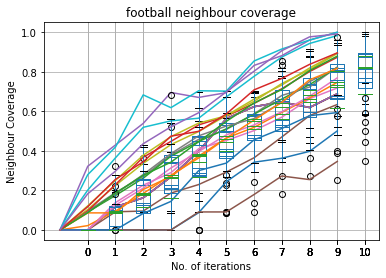

In [ ]:
%matplotlib inline
plt.figure()
plt.title('football neighbour coverage')
plt.ylabel('Neighbour Coverage')
plt.xlabel('No. of iterations')
df_min.boxplot()
plt.plot(df_min_stats.loc['min'])
plt.plot(df_min_stats.loc['25%'])
plt.plot(df_min_stats.loc['50%'])
plt.plot(df_min_stats.loc['75%'])
plt.plot(df_min_stats.loc['max'])
df_min_med.boxplot()
plt.plot(df_min_med_stats.loc['min'])
plt.plot(df_min_med_stats.loc['25%'])
plt.plot(df_min_med_stats.loc['50%'])
plt.plot(df_min_med_stats.loc['75%'])
plt.plot(df_min_med_stats.loc['max'])
df_median.boxplot()
plt.plot(df_median_stats.loc['min'])
plt.plot(df_median_stats.loc['25%'])
plt.plot(df_median_stats.loc['50%'])
plt.plot(df_median_stats.loc['75%'])
plt.plot(df_median_stats.loc['max'])
df_max_med.boxplot()
plt.plot(df_max_med_stats.loc['min'])
plt.plot(df_max_med_stats.loc['25%'])
plt.plot(df_max_med_stats.loc['50%'])
plt.plot(df_max_med_stats.loc['75%'])
plt.plot(df_max_med_stats.loc['max'])
df_max.boxplot()
plt.plot(df_max_stats.loc['min'])
plt.plot(df_max_stats.loc['25%'])
plt.plot(df_max_stats.loc['50%'])
plt.plot(df_max_stats.loc['75%'])
plt.plot(df_max_stats.loc['max'])

PLOTTING SEPERATE GRAPHS FOR ALL STATISTICAL MEASURES OF min, min_med, median, max_med, max

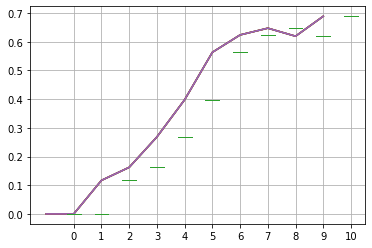

In [ ]:
df_min.boxplot()
plt.plot(df_min_stats.loc['min'])
plt.plot(df_min_stats.loc['25%'])
plt.plot(df_min_stats.loc['50%'])
plt.plot(df_min_stats.loc['75%'])
plt.plot(df_min_stats.loc['max'])

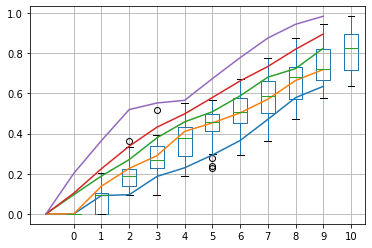

In [ ]:
df_min_med.boxplot()
plt.plot(df_min_med_stats.loc['min'])
plt.plot(df_min_med_stats.loc['25%'])
plt.plot(df_min_med_stats.loc['50%'])
plt.plot(df_min_med_stats.loc['75%'])
plt.plot(df_min_med_stats.loc['max'])

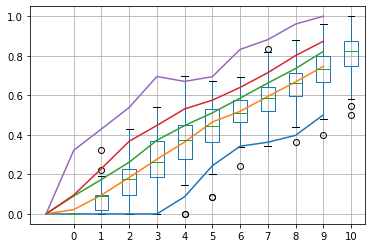

In [ ]:
df_median.boxplot()
plt.plot(df_median_stats.loc['min'])
plt.plot(df_median_stats.loc['25%'])
plt.plot(df_median_stats.loc['50%'])
plt.plot(df_median_stats.loc['75%'])
plt.plot(df_median_stats.loc['max'])

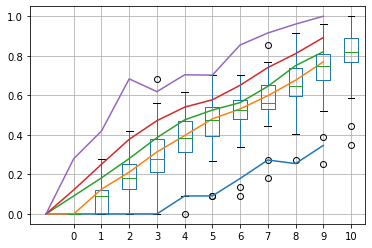

In [ ]:
df_max_med.boxplot()
plt.plot(df_max_med_stats.loc['min'])
plt.plot(df_max_med_stats.loc['25%'])
plt.plot(df_max_med_stats.loc['50%'])
plt.plot(df_max_med_stats.loc['75%'])
plt.plot(df_max_med_stats.loc['max'])

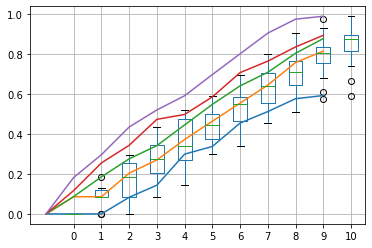

In [ ]:
df_max.boxplot()
plt.plot(df_max_stats.loc['min'])
plt.plot(df_max_stats.loc['25%'])
plt.plot(df_max_stats.loc['50%'])
plt.plot(df_max_stats.loc['75%'])
plt.plot(df_max_stats.loc['max'])